In [132]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV files
folder = './catanatron/'
lite_data = pd.read_csv(folder + 'test1_lite.csv')
com_data = pd.read_csv(folder + 'test1_com.csv')

# Columns to analyze based index
columns = ['game', 'trades', 'robbers', 'dev_cards_bought', 'knights', 'monopolys', 'roadbuilds', 'yearofplentys', 
           'vpcards', 'victorypoints', 'cities', 'settlements', 'roads', 'model_actions', 'helper_actions']

# Filter data
lite_data_filtered = lite_data[columns]
com_data_filtered = com_data[columns]

In [134]:
# Calculate action ratio (model to helper)
lite_data_filtered['action_ratio'] = lite_data_filtered['model_actions'] / (lite_data_filtered['model_actions'] + lite_data_filtered['helper_actions'])
com_data_filtered['action_ratio'] = com_data_filtered['model_actions'] / (com_data_filtered['model_actions'] + com_data_filtered['helper_actions'])

# Filter for games with model:helper ratio that is above 60%
lite_high_model_ratio = lite_data_filtered[lite_data_filtered['action_ratio'] > 0.6]
com_high_model_ratio = com_data_filtered[com_data_filtered['action_ratio'] > 0.6]

# Calculate average win rates, buildings, trades, and victory points
lite_stats = lite_high_model_ratio[['victorypoints', 'trades', 'cities', 'settlements']].mean()
com_stats = com_high_model_ratio[['victorypoints', 'trades', 'cities', 'settlements']].mean()

# Combine into a single DataFrame for display
stats_summary = pd.DataFrame({'Lite': lite_stats, 'Complex': com_stats})
stats_summary.loc['win_rate'] = [len(lite_high_model_ratio[lite_high_model_ratio['victorypoints'] >= 10]) / len(lite_high_model_ratio),
                                 len(com_high_model_ratio[com_high_model_ratio['victorypoints'] >= 10]) / len(com_high_model_ratio)]

# Display the summary table
print(stats_summary)

                    Lite    Complex
victorypoints   3.934783   4.580645
trades         21.695652  24.064516
cities          0.478261   0.806452
settlements     1.652174   1.354839
win_rate        0.043478   0.129032


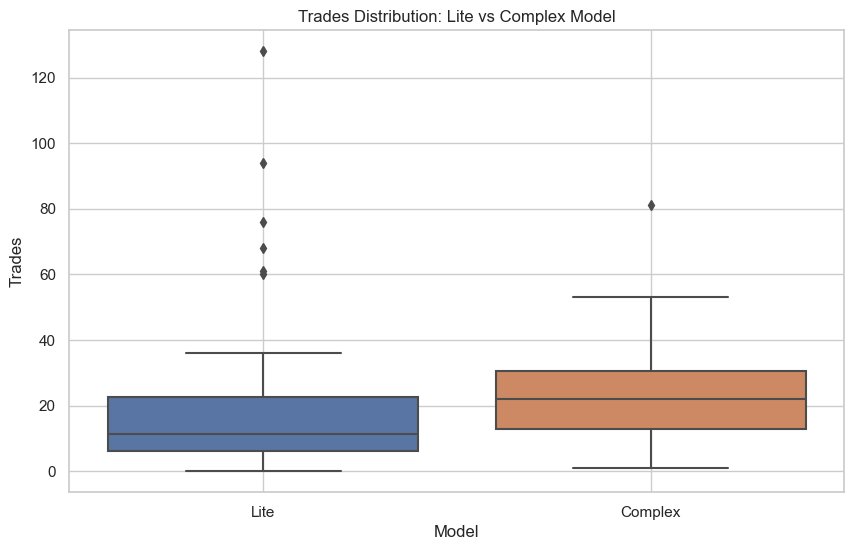

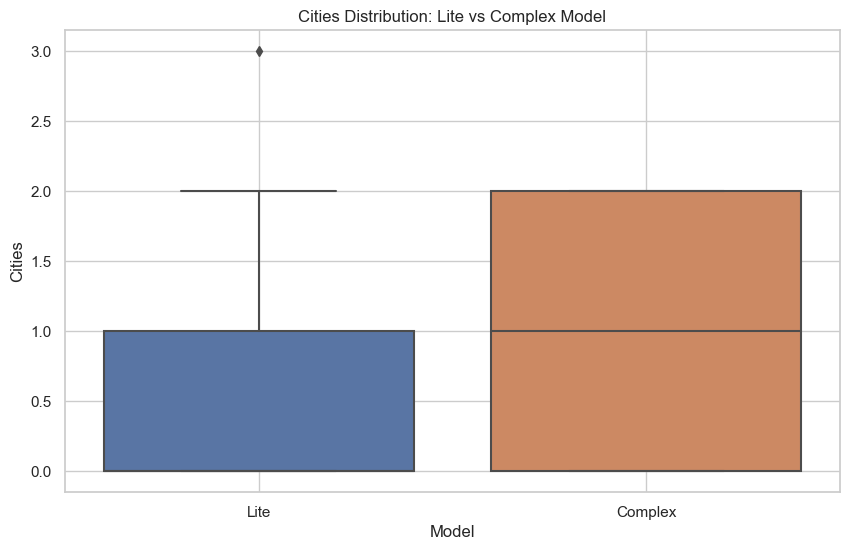

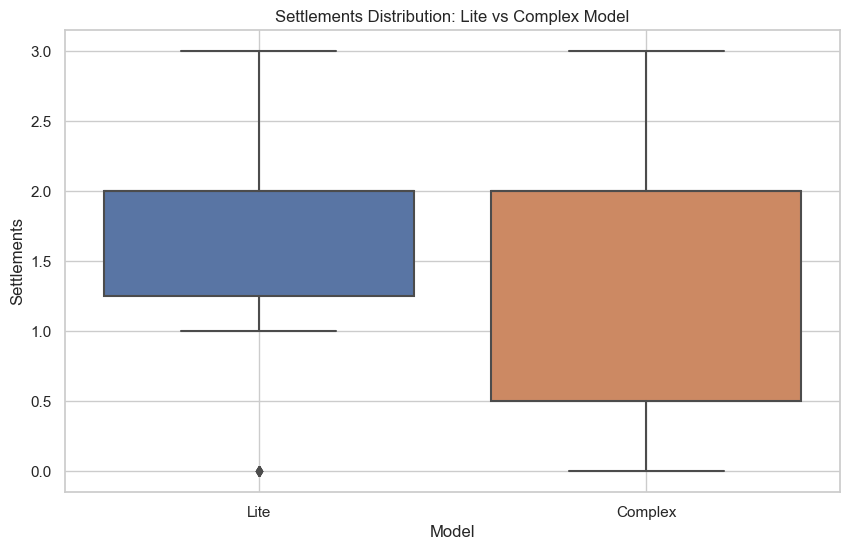

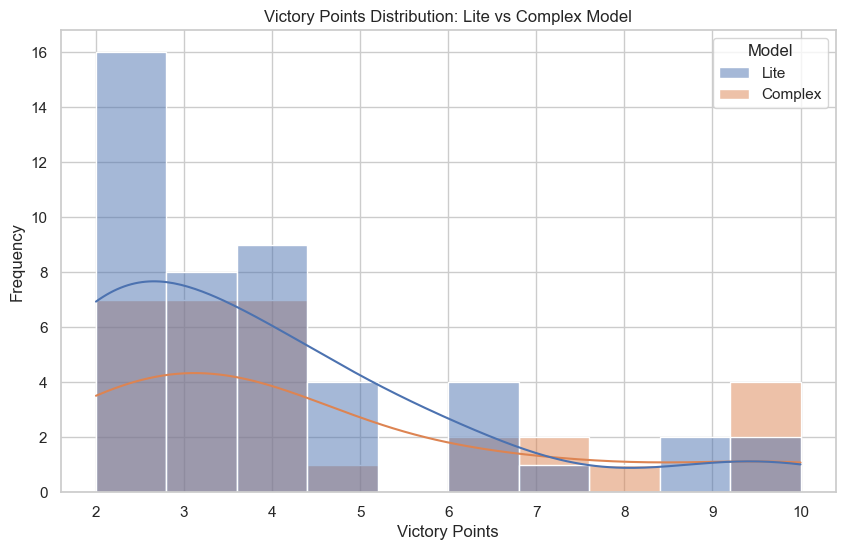

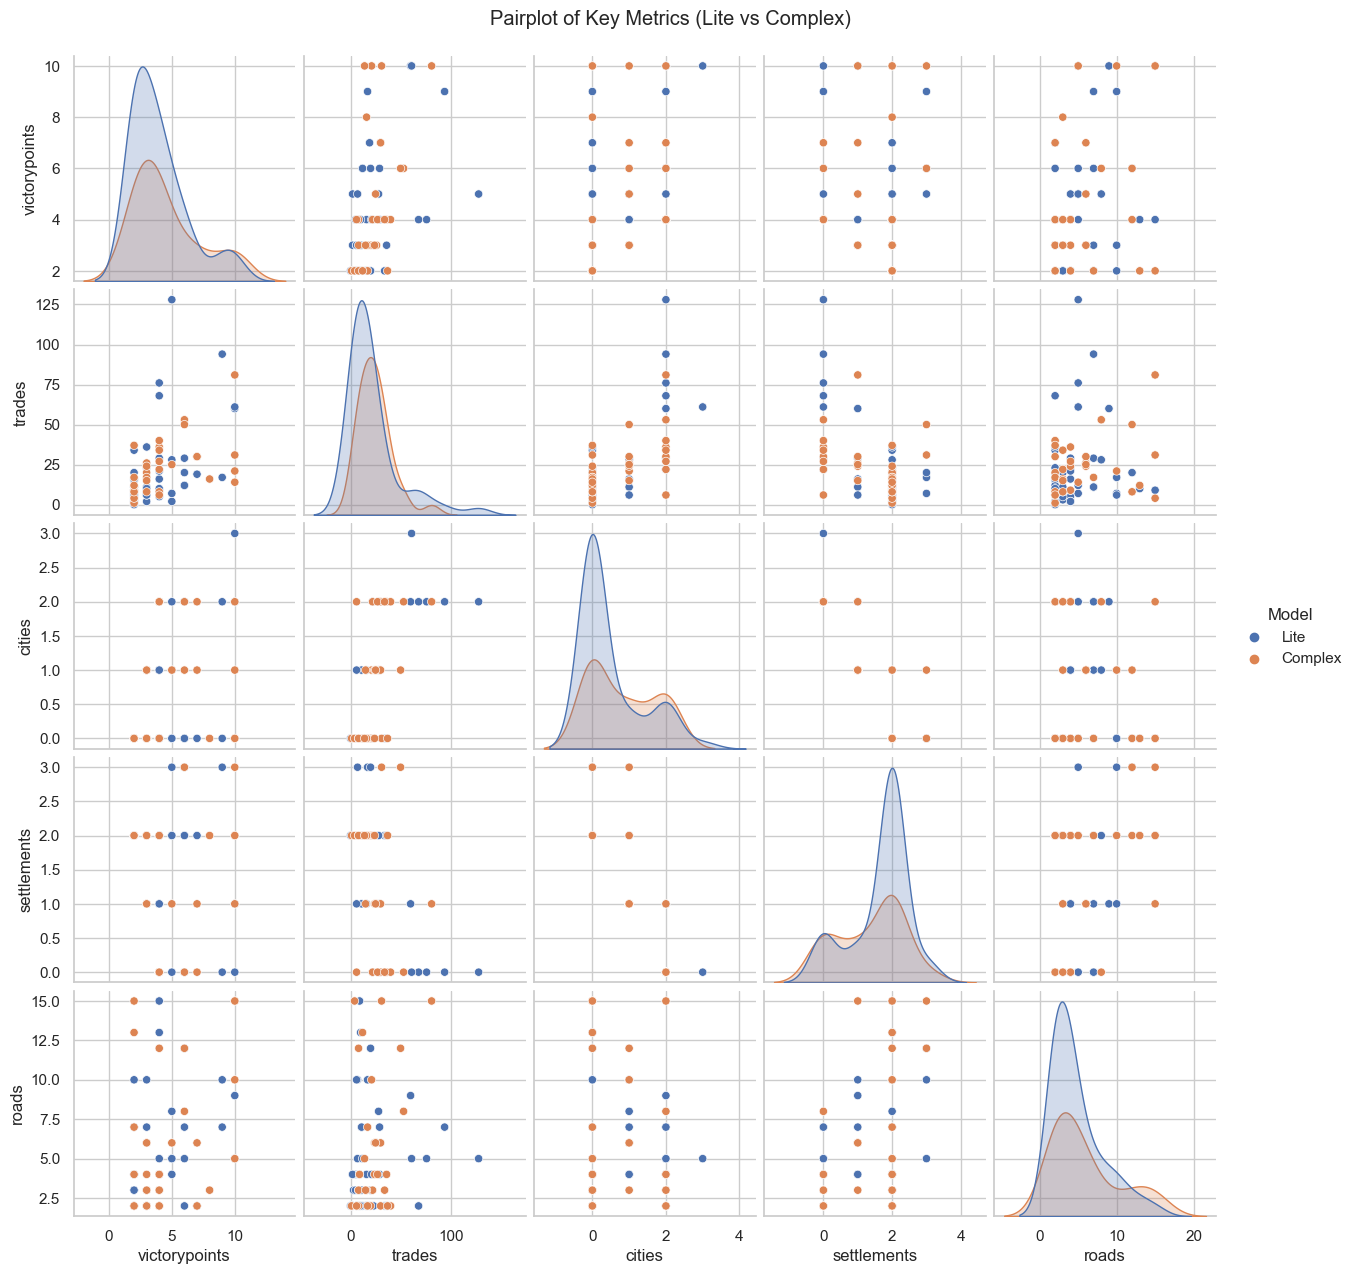

In [138]:
# Box plot for trades, cities, and settlements comparison between Basic and Complex models
plt.figure(figsize=(10, 6)) # Trade averages
sns.boxplot(x='Model', y='trades', data=pd.concat([lite_high_model_ratio.assign(Model='Lite'), com_high_model_ratio.assign(Model='Complex')]))
plt.title('Trades Distribution: Lite vs Complex Model')
plt.ylabel('Trades')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6)) # City averages
sns.boxplot(x='Model', y='cities', data=pd.concat([lite_high_model_ratio.assign(Model='Lite'), com_high_model_ratio.assign(Model='Complex')]))
plt.title('Cities Distribution: Lite vs Complex Model')
plt.ylabel('Cities')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6)) # Settlement averages
sns.boxplot(x='Model', y='settlements', data=pd.concat([lite_high_model_ratio.assign(Model='Lite'), com_high_model_ratio.assign(Model='Complex')]))
plt.title('Settlements Distribution: Lite vs Complex Model')
plt.ylabel('Settlements')
plt.grid(True)
plt.show()

# Histogram for comparing victory points distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=pd.concat([lite_high_model_ratio.assign(Model='Lite'), com_high_model_ratio.assign(Model='Complex')]), x='victorypoints', hue='Model', bins=10, kde=True)
plt.title('Victory Points Distribution: Lite vs Complex Model')
plt.xlabel('Victory Points')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Pairplot (dot matrix) for visualizing the relationships between various statistics
combined_high_ratio_data = pd.concat([lite_high_model_ratio.assign(Model='Lite'), com_high_model_ratio.assign(Model='Complex')])

# Selecting columns for the pairplot
columns_for_pairplot = ['victorypoints', 'trades', 'cities', 'settlements', 'roads']

# Pairplot
sns.pairplot(combined_high_ratio_data, hue='Model', vars=columns_for_pairplot, diag_kind='kde')
plt.suptitle('Pairplot of Key Metrics (Lite vs Complex)', y=1.02)
plt.show()

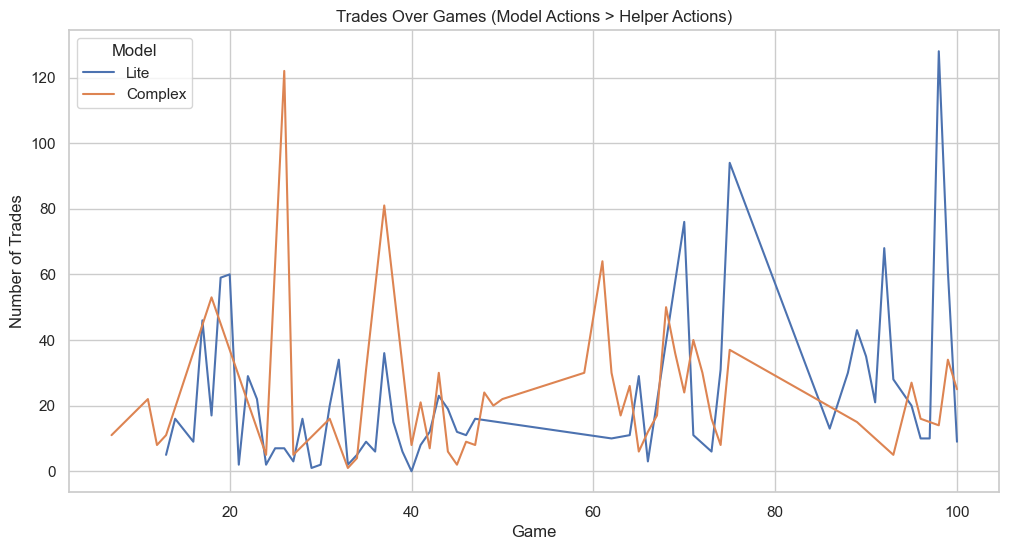

C:\Users\user\AppData\Local\Temp\ipykernel_54532\1329780847.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_dominant['total_builds'] = model_dominant['settlements'] + model_dominant['cities']


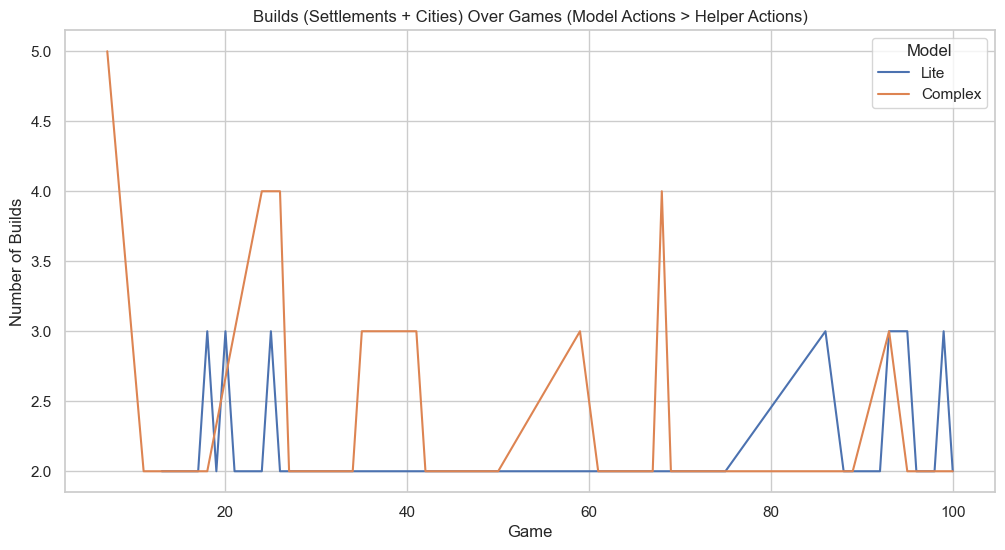

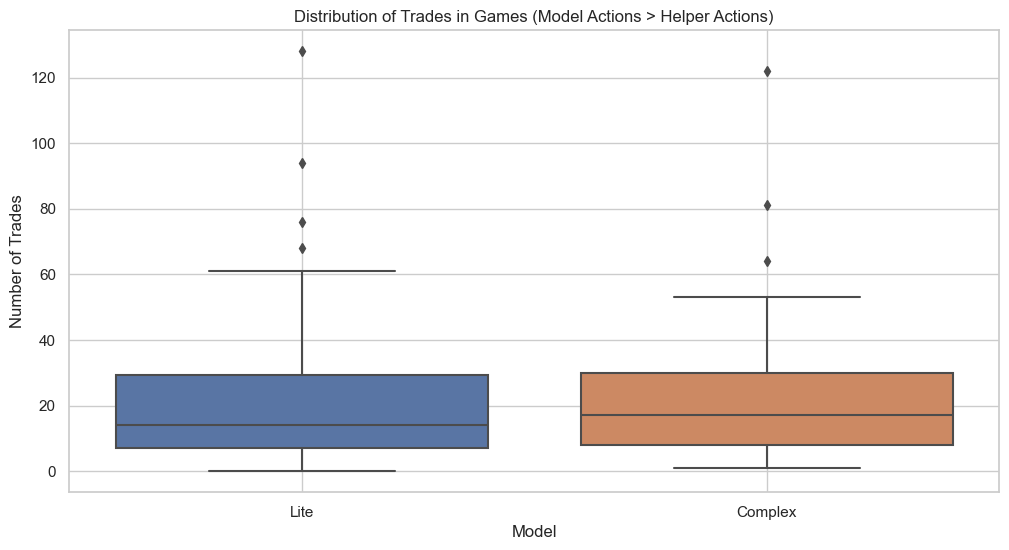

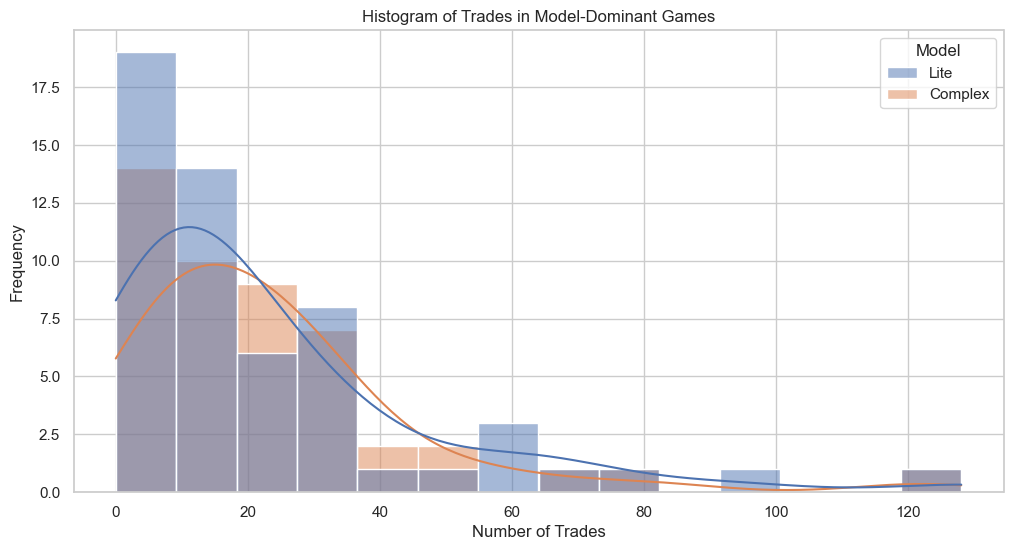

In [140]:
# Take data for games where the model has more actions than the helper model
model_dominant = combined_data[combined_data['model_actions'] > combined_data['helper_actions']]

# Line plot for trades over games where the model predicts more
plt.figure(figsize=(12, 6))
sns.lineplot(x='game', y='trades', hue='Model', data=model_dominant)
plt.title('Trades Over Games (Model Actions > Helper Actions)')
plt.xlabel('Game')
plt.ylabel('Number of Trades')
plt.legend(title='Model')
plt.grid(True)
plt.show()

# Line plot for builds (settlements + cities) in model-dominant games
plt.figure(figsize=(12, 6))
model_dominant['total_builds'] = model_dominant['settlements'] + model_dominant['cities']
sns.lineplot(x='game', y='total_builds', hue='Model', data=model_dominant)
plt.title('Builds (Settlements + Cities) Over Games (Model Actions > Helper Actions)')
plt.xlabel('Game')
plt.ylabel('Number of Builds')
plt.legend(title='Model')
plt.grid(True)
plt.show()

# Boxplot to compare trades distribution in model-dominant games
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='trades', data=model_dominant)
plt.title('Distribution of Trades in Games (Model Actions > Helper Actions)')
plt.ylabel('Number of Trades')
plt.grid(True)
plt.show()

# Histogram for number of trades
plt.figure(figsize=(12, 6))
sns.histplot(data=model_dominant, x='trades', hue='Model', kde=True)
plt.title('Histogram of Trades in Model-Dominant Games')
plt.xlabel('Number of Trades')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

    Batch  Win Rate (%)  Average Buildings  Average Victory Points  \
0   1 Bot          74.8             13.036                   9.056   
1  2 Bots          62.8             12.892                   8.512   
2  3 Bots          52.0             12.428                   7.864   

   Average VP Cards  Average Dev Cards  
0             1.348             13.168  
1             1.220             16.124  
2             1.136             18.796  


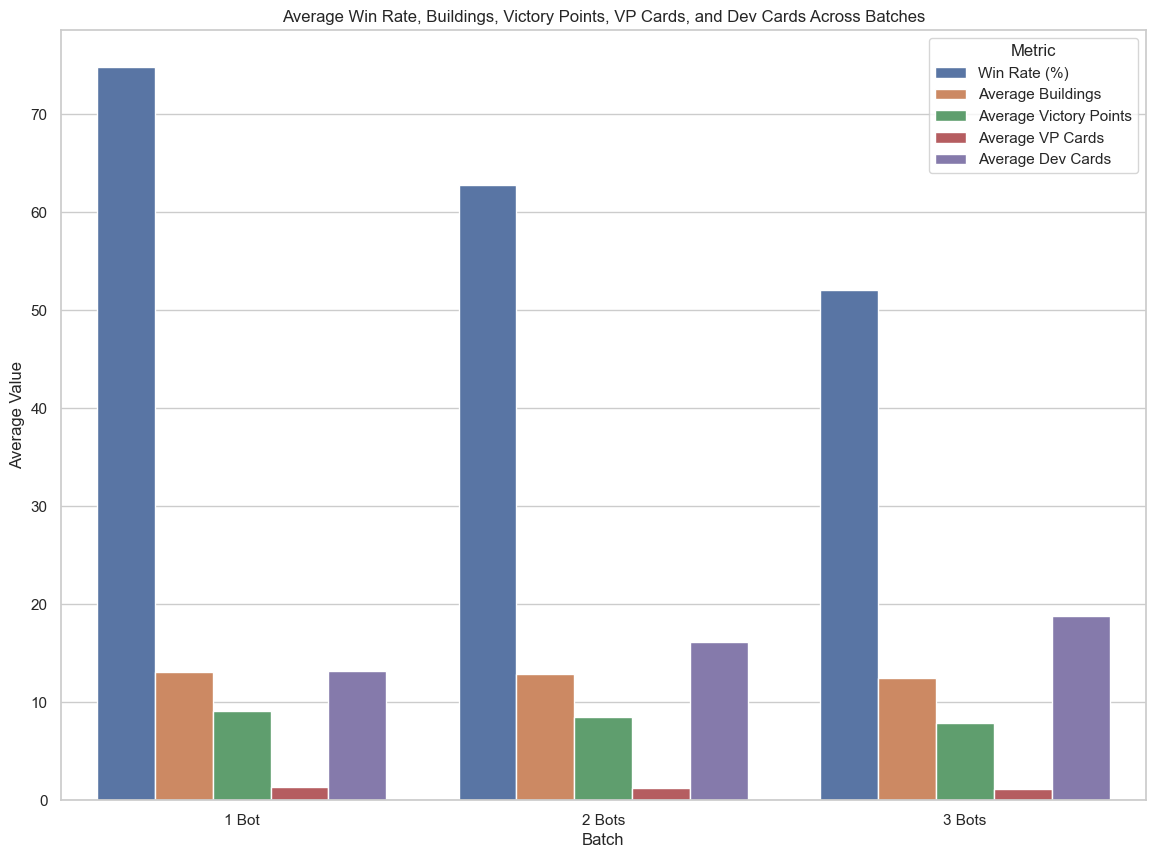

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


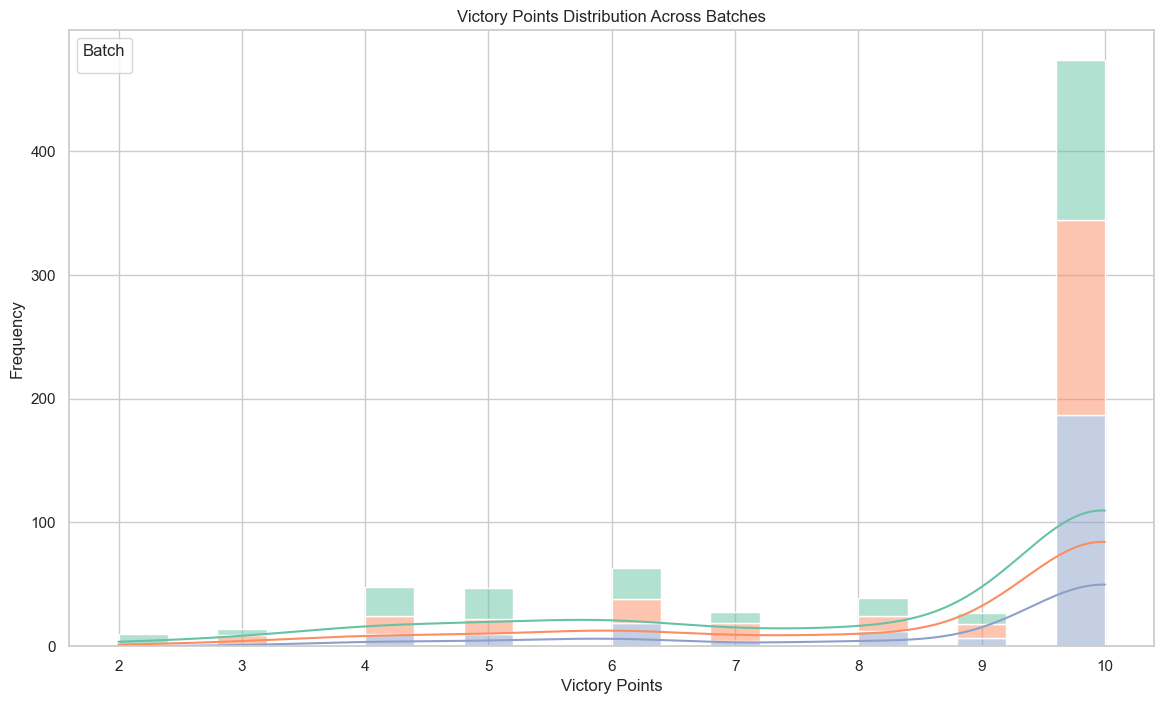

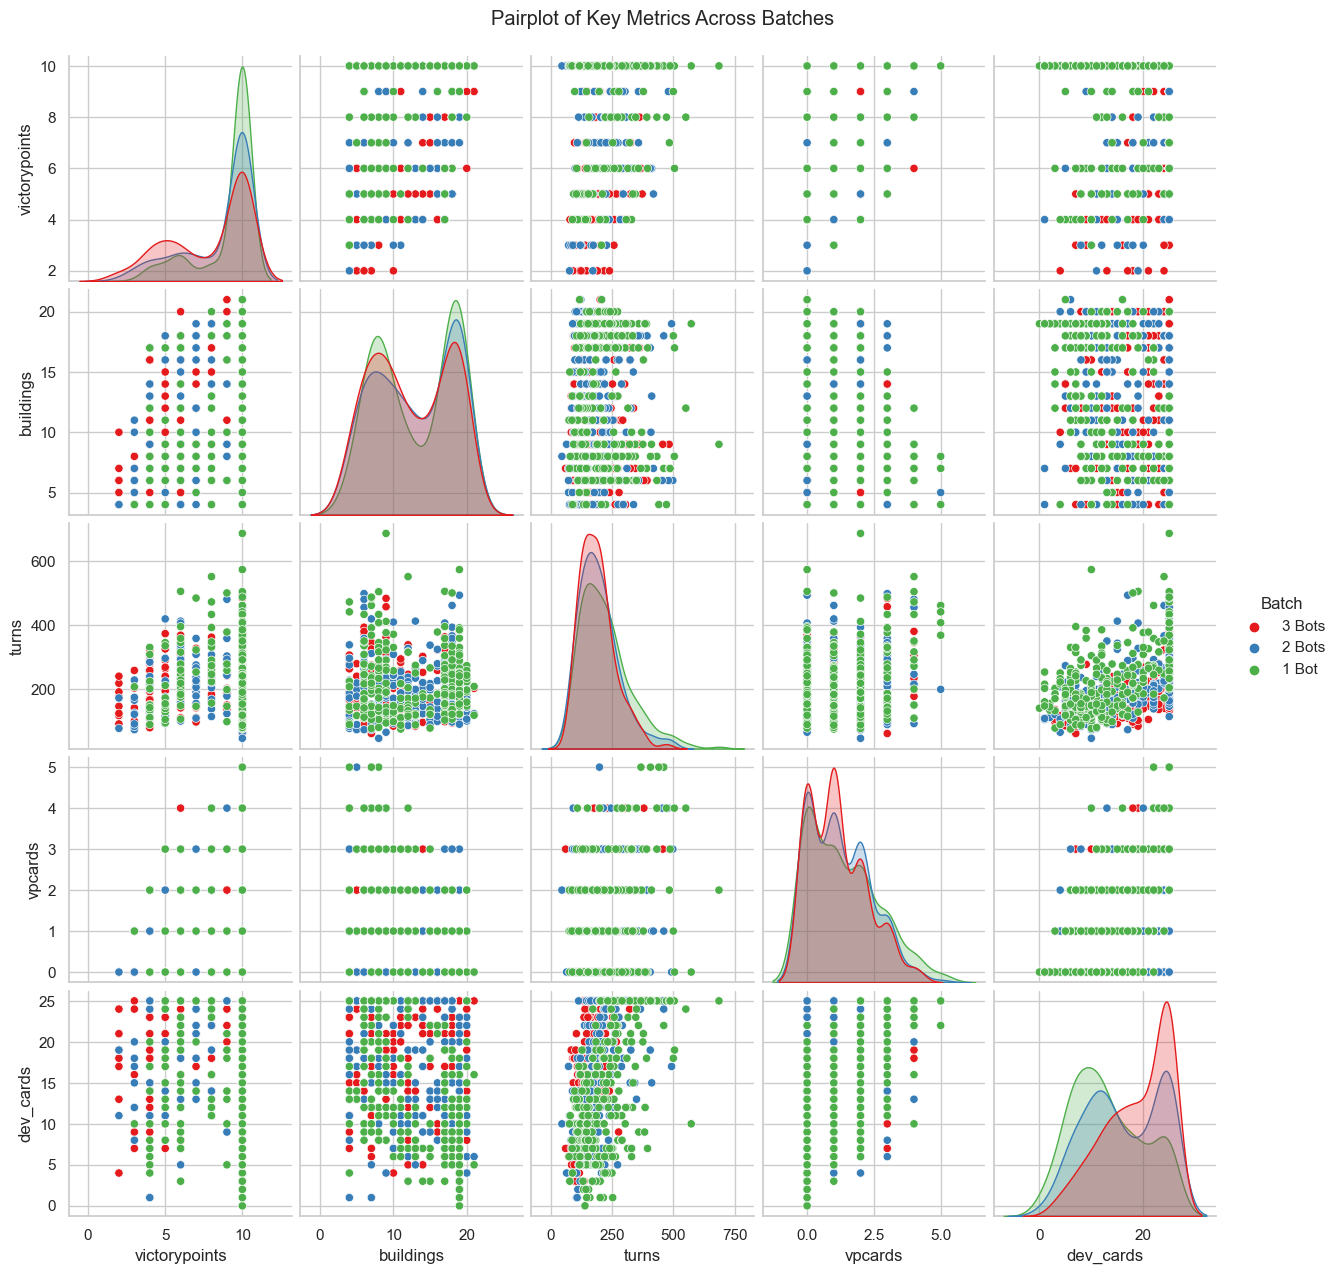

In [143]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for white aesthetic
sns.set(style="whitegrid")

# Load CSV file
folder = './catanatron/'
kane_data = pd.read_csv(folder + 'kane.csv')

# Columns based on index
columns = ['game', 'turns', 'players', 'cities', 'settlements', 'roads', 'victorypoints', 'vpcards', 'dev_cards']

# Filter data
kane_filtered = kane_data[columns]

# Define batch ranges based on the number of players
batch_1 = kane_filtered[kane_filtered['players'] == 4]  # 3 bots
batch_2 = kane_filtered[kane_filtered['players'] == 3]  # 2 bots
batch_3 = kane_filtered[kane_filtered['players'] == 2]  # 1 bot

# Assign batch labels
batch_1 = batch_1.copy()
batch_1['Batch'] = '3 Bots'

batch_2 = batch_2.copy()
batch_2['Batch'] = '2 Bots'

batch_3 = batch_3.copy()
batch_3['Batch'] = '1 Bot'

# Combine batches into a single DataFrame for processing
batches = pd.concat([batch_1, batch_2, batch_3], ignore_index=True)

# Calculate Buildings as a separate column
batches['buildings'] = batches['cities'] + batches['settlements'] + batches['roads']

# Define a function to calculate statistics for each batch
def calculate_stats(df):
    total_games = len(df)
    wins = len(df[df['victorypoints'] >= 10]) 
    win_rate = (wins / total_games) * 100  # Percentage
    avg_buildings = df['buildings'].mean() # average buildings
    avg_victorypoints = df['victorypoints'].mean() # average victory points
    avg_vpcards = df['vpcards'].mean()
    avg_dev_cards = df['dev_cards'].mean()
    return pd.Series({
        'Win Rate (%)': win_rate,
        'Average Buildings': avg_buildings,
        'Average Victory Points': avg_victorypoints,
        'Average VP Cards': avg_vpcards,
        'Average Dev Cards': avg_dev_cards
    })

# Group by Batch and calculate statistics
stats_summary = batches.groupby('Batch').apply(calculate_stats).reset_index()

# Display the summary table
print(stats_summary)

# ------------------- Visualization -------------------

# Melt the stats_summary DataFrame for easier plotting with Seaborn
stats_melted = stats_summary.melt(id_vars='Batch', var_name='Metric', value_name='Value')

# Bar plot
plt.figure(figsize=(14, 10))
sns.barplot(x='Batch', y='Value', hue='Metric', data=stats_melted)
plt.title('Average Win Rate, Buildings, Victory Points, VP Cards, and Dev Cards Across Batches')
plt.ylabel('Average Value')
plt.xlabel('Batch')
plt.legend(title='Metric')
plt.show()

# Histogram for Victory Points
plt.figure(figsize=(14, 8))
sns.histplot(data=batches, x='victorypoints', hue='Batch', multiple='stack', bins=20, palette='Set2', kde=True)
plt.title('Victory Points Distribution Across Batches')
plt.xlabel('Victory Points')
plt.ylabel('Frequency')
plt.legend(title='Batch')
plt.show()

# Pairplot for key metrics
sns.pairplot(batches, vars=['victorypoints', 'buildings', 'turns', 'vpcards', 'dev_cards'], hue='Batch', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Key Metrics Across Batches', y=1.02)
plt.show()